### <center> R Pharma 2021 </center> 
# <center> Hands-on Training for Machine Learning Programming - Natural Language Processing </center>
## <center> Kevin Lee, Genpact </center>

### ABSTRACT
One of the most popular Machine Learning implementation is Natural Language Processing (NLP).  NLP is a Machine Learning application or service which are able to understand human language.  Some practical implementations are speech recognition, machine translation and chatbot.   Sri, Alexa and Google Home are popular applications whose technologies are based on NLP. 

Hands-on Training of NLP Machine Learning Programming is intended for statistical programmers and biostatisticians who want to learn how to conduct simple NLP Machine Learning projects. Hands-on NLP training will use the most popular Machine Learning program - Python. The training will also use the most popular Machine Learning platform, Jupyter Notebook/Lab. During hands-on training, programmers will use actual Python codes in Jupyter notebook to run simple NLP Machine Learning projects. In the training, programmers will also get introduced popular NLP Machine Learning packages such as keras, pytorch, nltk, BERT, spacy and others. 


### Natural Language Processing (NLP)
Introduction of NLP – An area of artificial intelligence on an interaction between computer and human natural language.  NLP can program computers to process and analyze natural language data.
- Input data – Language
- Output data - Language 
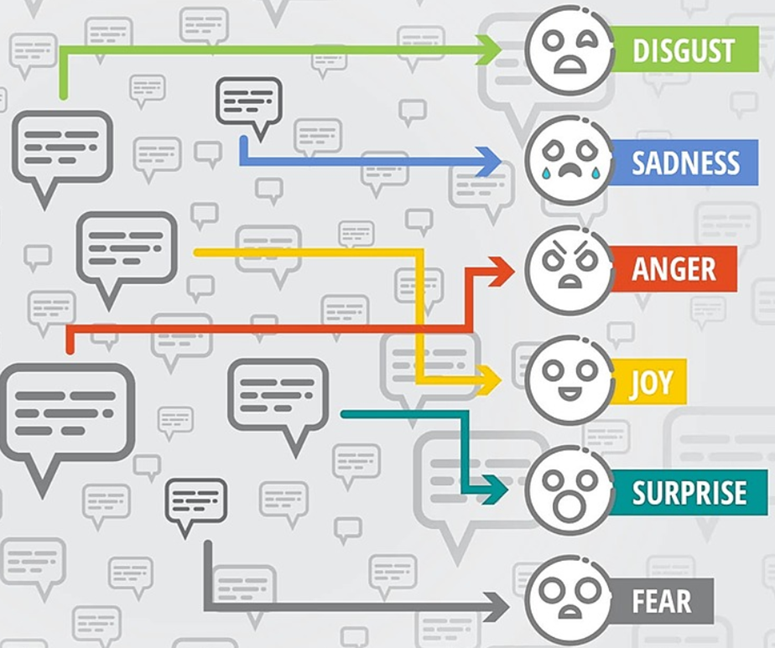

### Popular NLP Implementation
Text notation.   # of inputs = # of outputs <br>
Examples : Apple Siri, Amazon Alexa
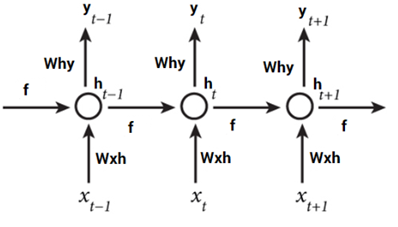

Sentimental Analysis: x = text, y = 0/1 or 1 to 5 <br>
Example : Pharmacovigilance (Safety) Signal
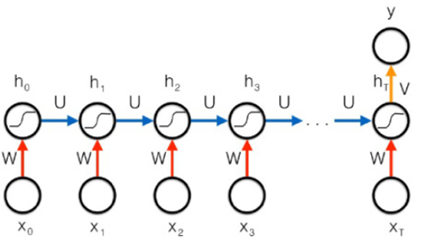

Music generation \ Picture Description: x= vector, y = text
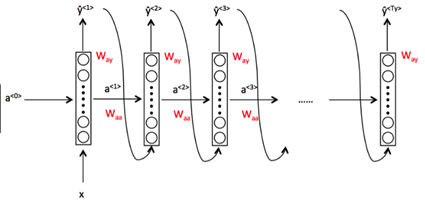

Machine translation : x = text in English, y = text in French
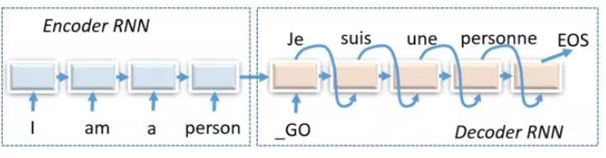

### NLP Machine Learning Model -  Recurrent Neural Network (RNN) 
Introduction – recurrent neural network model to use sequential information.

Why RNN for NLP?
- In traditional Machine Learning models even for Deep Learning, all inputs and outputs are independent of each other.  But, in some case, they could be dependent. 
- RNN is useful when inputs are dependent. 
- Some problems such as text analysis and translation, we need to understand which words come before.  
- RNN has a memory which captures previous information about what has been calculated so far.  
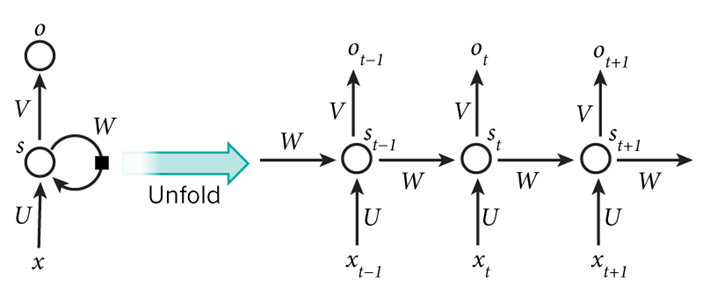

### Basic RNN Structure and Algorithms
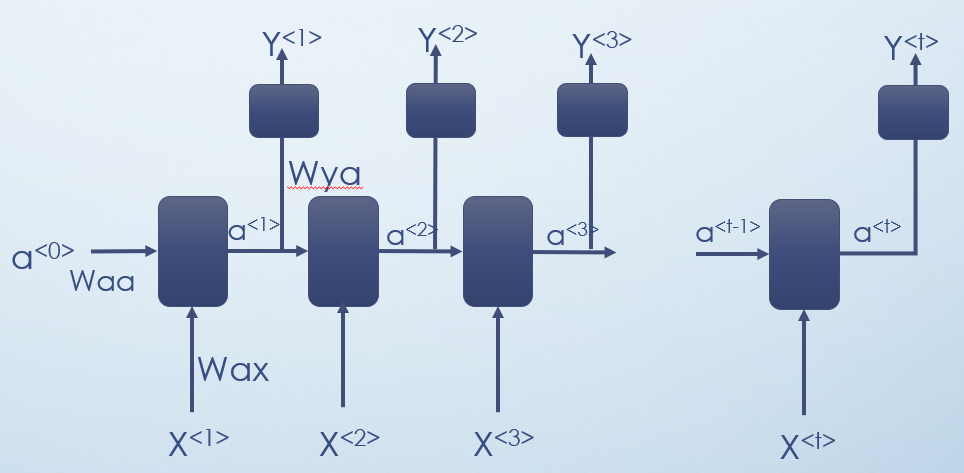

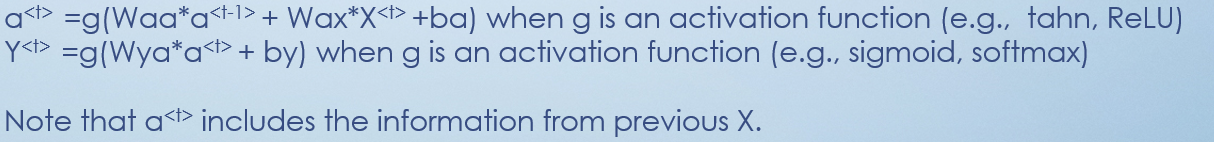

### RNN unit - LSTM (Long Short-Term Memory Unit) 
- It is composed of 4 gates – input, forget, gate and output. 
- LSTM remembers values over arbitrary time intervals and the 3 gates regulate the flow of information into and out of LSTM unit. 
- LSTMs were developed to deal with the vanishing gradient problems.
- Relative insensitivity to gap length is an advantage of LSTM over RNNs.

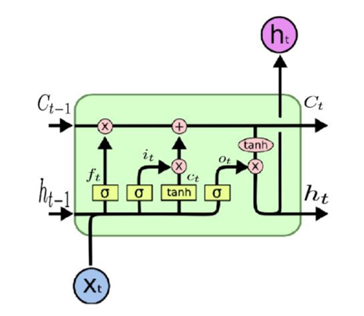

### Simple RNN architecture using NLP
- Input data – “I am smiling”, “I laugh now”, “I am crying”, “I feel good”, “I am not sure now”
- Embedding – to convert words to vector number
- LSTM – to learn language
- Softmax – to provide probability of output
- Output data - “very unhappy”, “unhappy”, “happy”, “very happy” 

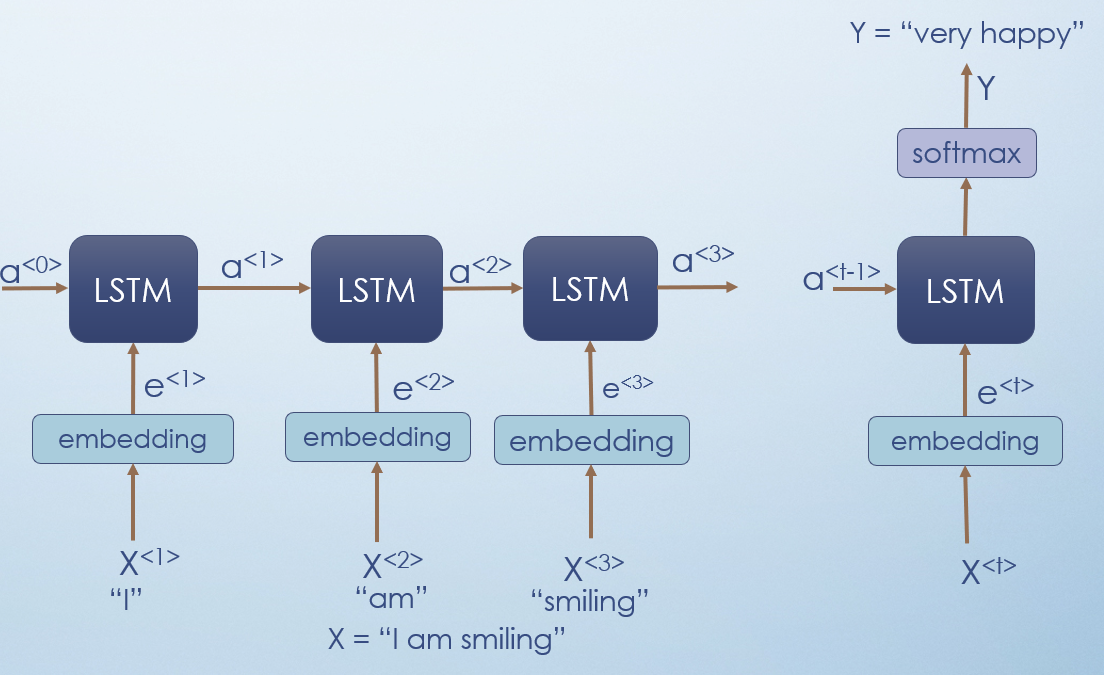

### Natural Language Processing (NLP) Machine Learning Model Building Process
1. Import text data and do data preparation 
2. Tokenizing – representing each word to numeric integer number : “the” to 50
3. Padding – fixing all the records to the same length
4. Embedding – representing word(numeric number) to vectors of numbers <br>
   5o to [ 0.418, 0.24968, -0.41242, 0.1217, 0.34527, -0.044457, -0.49688, -0.17862, -0.00066023,,,,, ] 
5. Training RNN models with the embedded training data
6. Validate RNN models

## Workshop problem
Build the simple NLP models to predict whether the given short texts means positive or not. <br>
For example, "I love it" means "positive" or "negative"?

#### 1. Import Data and Preparation
- Import document to working area
- Convert document to sentences
- Split sentence to words
- Filter out punctuation
- Convert words to lower case
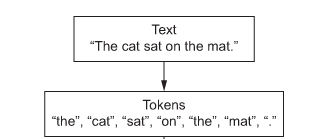

In [76]:
## import libraries
import numpy as np

In [77]:
## Define the text data
inputs = ['Well Done', 'Good Work', 'Great effort', 'Nice Work', 'Excellent', 
          'Awesome', 'It is magnificent', 'How good are you', 'outstanding', 'That is outstanding',
        'Weak', 'Poor Effort', 'not good', 'poor work','Could have done better',
         'It is low','That is not good', 'really bad','I am sad', 'That is cheap shot']

## labels - 1 for positive & 0 for negative
labels = [1,1,1,1,1,
          1,1,1,1,1,
          0,0,0,0,0,
          0,0,0,0,0]

In [78]:
## Python Programming for importing word preparation
from keras.preprocessing.text import text_to_word_sequence

line =[ ]
for text in inputs:
    words = text_to_word_sequence(text)
    line.append(words)
print(line)



[['well', 'done'], ['good', 'work'], ['great', 'effort'], ['nice', 'work'], ['excellent'], ['awesome'], ['it', 'is', 'magnificent'], ['how', 'good', 'are', 'you'], ['outstanding'], ['that', 'is', 'outstanding'], ['weak'], ['poor', 'effort'], ['not', 'good'], ['poor', 'work'], ['could', 'have', 'done', 'better'], ['it', 'is', 'low'], ['that', 'is', 'not', 'good'], ['really', 'bad'], ['i', 'am', 'sad'], ['that', 'is', 'cheap', 'shot']]


#### 2. Tokenization
- Tokens - words
- Tokenizing - Representing word(numeric number) to integer number
- Word “the” to 1
- Words are represented by dense vectors where a vector represents the projection of the word into a continuous vector space

In [79]:
## Python Programming for importing word preparation
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(line)


In [80]:
## printing
print("Tokenizer coding : ", tokenizer.index_word)

Tokenizer coding :  {1: 'is', 2: 'good', 3: 'work', 4: 'that', 5: 'done', 6: 'effort', 7: 'it', 8: 'outstanding', 9: 'poor', 10: 'not', 11: 'well', 12: 'great', 13: 'nice', 14: 'excellent', 15: 'awesome', 16: 'magnificent', 17: 'how', 18: 'are', 19: 'you', 20: 'weak', 21: 'could', 22: 'have', 23: 'better', 24: 'low', 25: 'really', 26: 'bad', 27: 'i', 28: 'am', 29: 'sad', 30: 'cheap', 31: 'shot'}


In [81]:
## Tokenization
tokenized_words = tokenizer.texts_to_sequences(line)
print("Tokenized words to number : ", tokenized_words)


Tokenized words to number :  [[11, 5], [2, 3], [12, 6], [13, 3], [14], [15], [7, 1, 16], [17, 2, 18, 19], [8], [4, 1, 8], [20], [9, 6], [10, 2], [9, 3], [21, 22, 5, 23], [7, 1, 24], [4, 1, 10, 2], [25, 26], [27, 28, 29], [4, 1, 30, 31]]


#### 3. Padding
- Padding – Preparing tokenized input data into the same length so that input data can go into Embedding layer
- It will make all the records to fixed, consistent length.  


In [82]:
from keras.preprocessing.sequence import pad_sequences
max_length = 5
padded_lines = pad_sequences(tokenized_words , maxlen=max_length, padding='post')

print(padded_lines )

[[11  5  0  0  0]
 [ 2  3  0  0  0]
 [12  6  0  0  0]
 [13  3  0  0  0]
 [14  0  0  0  0]
 [15  0  0  0  0]
 [ 7  1 16  0  0]
 [17  2 18 19  0]
 [ 8  0  0  0  0]
 [ 4  1  8  0  0]
 [20  0  0  0  0]
 [ 9  6  0  0  0]
 [10  2  0  0  0]
 [ 9  3  0  0  0]
 [21 22  5 23  0]
 [ 7  1 24  0  0]
 [ 4  1 10  2  0]
 [25 26  0  0  0]
 [27 28 29  0  0]
 [ 4  1 30 31  0]]


#### 4. Embedding
- Representing word(numeric number) to vectors of numbers <br>
    Word “the” to [ 0.418, 0.24968, -0.41242, 0.1217, 0.34527, -0.044457, -0.49688, -0.17862, -0.00066023,,,,, ] 
- Words are represented by dense vectors where a vector represents the projection of the word into a continuous vector space
- Embedding layer has embedding matrix which will be trained as a part of model. 
- The shape of embedding matrix is (vocabulary size, # of vector )
- Embedding layer types
- Keras Embedding layer – Random initiation on embedding matrix
- Pre-trained embedding methods
  - Word2Vec
  - GloVe
  - Gensim


In [83]:
## Import and download Gensim pre-model
import gensim
import gensim.downloader

pre_trained_wv = gensim.downloader.load('word2vec-google-news-300')

In [84]:
print("Embedding - outstanding   : \n", pre_trained_wv['outstanding'])

Embedding - outstanding   : 
 [-1.97265625e-01  1.64062500e-01  2.67578125e-01  1.51977539e-02
  1.68945312e-01  1.83105469e-02  2.29492188e-01 -4.05273438e-02
  1.02539062e-01  2.21679688e-01 -2.91015625e-01 -1.31835938e-01
  2.73437500e-01 -5.05371094e-02 -6.88476562e-02  1.56250000e-01
  3.16406250e-01  1.38671875e-01 -5.61523438e-02  1.27929688e-01
 -1.86523438e-01 -5.73730469e-02 -1.36718750e-01 -1.53808594e-02
  2.85156250e-01  6.49414062e-02  2.00195312e-01 -6.29882812e-02
 -1.19018555e-02  1.86767578e-02  1.80664062e-01 -2.96875000e-01
  4.19921875e-01  1.65039062e-01  4.70703125e-01  1.95312500e-01
 -6.78710938e-02 -1.14746094e-01  1.04492188e-01  3.80859375e-02
  2.27539062e-01 -6.34765625e-02 -2.23388672e-02  6.56127930e-03
 -1.46484375e-01 -1.51367188e-01  1.61132812e-01 -2.11914062e-01
  1.52343750e-01 -2.11914062e-01  2.68554688e-02 -2.70996094e-02
  1.16210938e-01  8.39843750e-02 -1.15234375e-01  1.24511719e-01
 -1.20605469e-01 -4.76074219e-03 -8.59375000e-02  9.66796875

#### Cosine similarity of two vectors
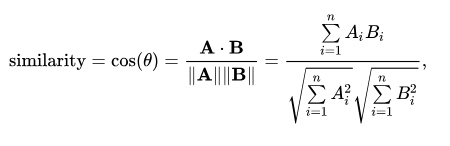

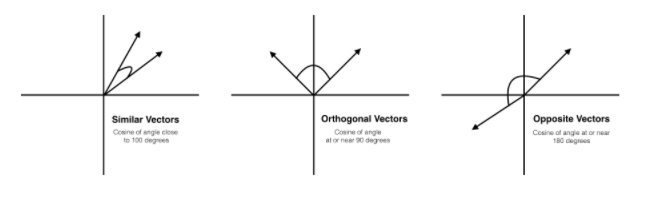

In [85]:
pre_trained_wv.similar_by_word(word='outstanding', topn=5)

[('oustanding', 0.8012187480926514),
 ('Outstanding', 0.6041857600212097),
 ('exceptional', 0.6031844615936279),
 ('anchorman_Jason_Lezak', 0.5947380661964417),
 ('outsanding', 0.566262423992157)]

In [86]:
capital = pre_trained_wv.most_similar(["Paris", "Britain"], ["France"], topn=1)
print(capital)

[('London', 0.7541897892951965)]


In [87]:
print("Similarity : ", pre_trained_wv.similarity('Britain', 'London'))
print("Similarity : ", pre_trained_wv.similarity("Paris", "Britain"))
print("Similarity : ", pre_trained_wv.similarity("France", "London"))

Similarity :  0.55041945
Similarity :  0.30187303
Similarity :  0.23295805


In [88]:
wv_model3.similar_by_word(word='outstanding', topn=5)

[('brig', 1.0),
 ('upstairs', 1.0),
 ('streets', 1.0),
 ('agrippa', 1.0),
 ('mclendon', 1.0)]

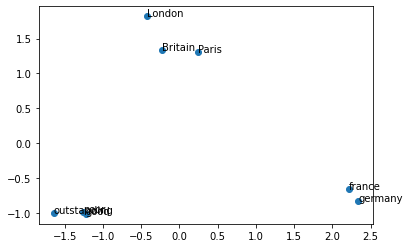

In [89]:
#Visualizing data
words = ["france", "germany", "Britain", "London", "Paris", "good", "outstanding", "poor"]
 
words_vector = pre_trained_wv[words]  ## conver words to vectors
pca = PCA(n_components=2) ## conver into 2 dimension
words_vector_dim2 = pca.fit_transform(words_vector)
 
pyplot.scatter(words_vector_dim2[:, 0], words_vector_dim2[:, 1])
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(words_vector_dim2[i, 0], words_vector_dim2[i, 1]))
pyplot.show()

#### 5. Train with RNN model

In [90]:
## import RNN model
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train_rnn)
X_input = tokenizer.texts_to_sequence(X_train_rnn)

In [91]:
model_rnn = Sequential()
model_rnn.add(Embedding(input_dim=40, output_dim=100, input_length=max_length))  
model_rnn.add(LSTM(10))
model_rnn.add(Dense(10, activation='relu'))
model_rnn.add(Dense(1, activation='sigmoid'))

model_rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_rnn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 5, 100)            4000      
_________________________________________________________________
lstm_3 (LSTM)                (None, 10)                4440      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 8,561
Trainable params: 8,561
Non-trainable params: 0
_________________________________________________________________


In [92]:
model_rnn = Sequential()
model_rnn.add(Embedding(input_dim=40, output_dim=100, input_length=5))  
model_rnn.add(LSTM(20))
model_rnn.add(Dense(10, activation='relu'))
model_rnn.add(Dense(1, activation='sigmoid'))

model_rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_rnn.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 5, 100)            4000      
_________________________________________________________________
lstm_4 (LSTM)                (None, 20)                9680      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 13,901
Trainable params: 13,901
Non-trainable params: 0
_________________________________________________________________


In [93]:
## Final Data Preparation
X_train_rnn = padded_lines
y_train_rnn = np.array(labels) ## update

print("X training shape : ", X_train_rnn.shape)
#print("y training shape : ", y_train_rnn.shape)

X training shape :  (20, 5)


In [94]:
## Train RNN model with 
model_rnn.fit(X_train_rnn, y_train_rnn, epochs=10)

## Predict with the trained RNN model
rnn_preds = model_rnn.predict(X_train_rnn)


Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 0.6922 - accuracy: 0.5500
Epoch 2/10
1/1 [==============================] - 0s 3ms/step - loss: 0.6904 - accuracy: 0.6000
Epoch 3/10
1/1 [==============================] - 0s 3ms/step - loss: 0.6887 - accuracy: 0.6000
Epoch 4/10
1/1 [==============================] - 0s 3ms/step - loss: 0.6870 - accuracy: 0.6000
Epoch 5/10
1/1 [==============================] - 0s 2ms/step - loss: 0.6851 - accuracy: 0.6000
Epoch 6/10
1/1 [==============================] - 0s 3ms/step - loss: 0.6831 - accuracy: 0.6500
Epoch 7/10
1/1 [==============================] - 0s 3ms/step - loss: 0.6809 - accuracy: 0.6500
Epoch 8/10
1/1 [==============================] - 0s 3ms/step - loss: 0.6785 - accuracy: 0.7000
Epoch 9/10
1/1 [==============================] - 0s 3ms/step - loss: 0.6759 - accuracy: 0.7000
Epoch 10/10
1/1 [==============================] - 0s 3ms/step - loss: 0.6731 - accuracy: 0.7000


In [95]:
## Evaluate RNN model - loss function and accuracy
model_rnn.evaluate(X_train_rnn, y_train_rnn)

1/1 [==============================] - 0s 258ms/step - loss: 0.6702 - accuracy: 0.7500


[0.6702430248260498, 0.75]

### Let's test NLP model

In [96]:
test_data = 'You are bad'
#test_data = 'Whatever'
#test_data = 'Just beat it'
#test_data = 'You are good'
#test_data = 'Extremely bad'

## Data Prepareation
test_data2 =[ ]
words2 = text_to_word_sequence(test_data) ## Vocabulization
test_data2.append(words2)
test_data3 = tokenizer.texts_to_sequences(test_data2) ## Tokenization
test_data4 = pad_sequences(test_data3, maxlen=max_length, padding='post') ## padded line
print("Test data features : ", test_data2, test_data3,  test_data4)

## Prediction
rnn_preds1 = model_rnn.predict(test_data4) 
rnn_preds3 = np.where(rnn_preds1 >= 0.5, 'Positive', 'Negative')

print(rnn_preds1)
print(rnn_preds3)

Test data features :  [['you', 'are', 'bad']] [[19, 18, 26]] [[19 18 26  0  0]]
[[0.521969]]
[['Positive']]


### NLP Implementation
- Speech Recognition
- Music Generation
- Sentiment Classification
- Machine Translation
- Video Activity Recognition
- Texts Classification and Extraction 
- DNA Sequence Analysis
- Chatbot
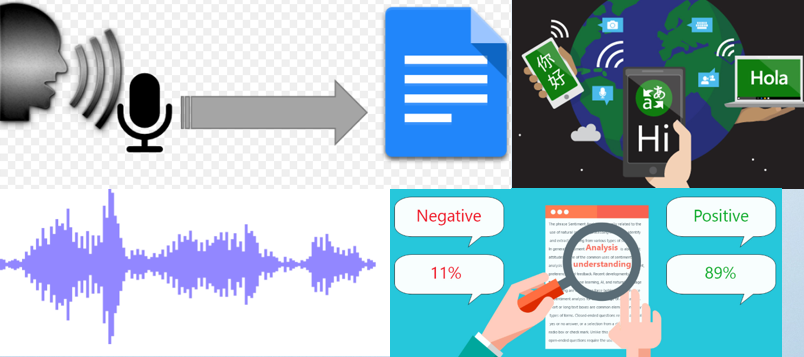

### CONCLUSION
Natural Language Processing (NLP) is one of the most popular Machine Learning implementation. NLP is used to analyze the human language, allowing the machine to understand what human communicates.  Its market is expected to grow from USD 11.6 billion in 2020 to USD 35.1billion in 2024 at the rate of 20.3%.  
Hands-on training has walked thru the basic NLP processes from Embedding, Tokenization and RNN model training.  The user could build a lot more complicated NLP models to analyze complex language projects.   


### CONTACT INFORMATION
Your comments and questions are valued and encouraged.  Please contact at: <br>
Kevin Lee <br>
AVP of Machine Learning and AI Consultant <br>
Kevin.lee@genpact.com <br>
Tweet: @HelloKevinLee <br>
LinkedIn: www.linkedin.com/in/HelloKevinLee/ <br>
